<a href="https://colab.research.google.com/github/RicardoMiles/Dissertation-template/blob/main/further-evaluation-202411220948.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/SummerProject/src')
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/SummerProject/src


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 定义包含CSV文件的文件夹路径
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
data_dir = os.path.join(root_dir, 'Data')
left_data = os.path.join(data_dir,'left')
right_data = os.path.join(data_dir,'right')

folder_path = left_data

# 获取left文件夹中所有CSV文件的列表
csv_files_left = [os.path.join(left_data, file) for file in os.listdir(left_data) if file.endswith('.csv')]
# 获取right文件夹中所有CSV文件的列表
csv_files_right = [os.path.join(right_data, file) for file in os.listdir(right_data) if file.endswith('.csv')]

print(f"Number of left files: {len(csv_files_left)}")
print(f"Number of right files: {len(csv_files_right)}")

Number of left files: 26
Number of right files: 26


In [3]:
from scipy import stats
# 定义特征提取函数
def extract_features(group):
    features = []
    # 遍历第三列到最后一列
    for col in group.columns[2:]:  # 从第三列开始提取特征
        data = group[col].values
        features.append(data.mean())  # 均值
        features.append(data.std())   # 标准差
        features.append(stats.skew(data))  # 偏度
        features.append(stats.kurtosis(data))  # 峰度
    return features

In [4]:
# 初始化存储所有特征和标签的列表
all_features = []
all_labels = []

# 初始化CSV文件计数器
csv_files_count = 0

# 处理left文件夹中的CSV文件
for file_name in csv_files_left:
    df = pd.read_csv(file_name)
    csv_files_count += 1  # 增加文件计数
    # 将数据按照epoch分组
    grouped = df.groupby(df.columns[1])  # 第二列是epoch分组的列
    for name, group in grouped:
        # 过滤掉time小于0的数据
        group = group[group[df.columns[0]] >= 0]  # 假设time列是第一列
        if len(group) == 81:  # 确保过滤后有81条数据
            # 提取特征
            features = group.iloc[:, 2:].values  # 第三列及以后是EEG通道信号
            all_features.append(features)
            # 获取标签
            all_labels.append('left')

# 处理right文件夹中的CSV文件
for file_name in csv_files_right:
    df_right = pd.read_csv(file_name)
    csv_files_count += 1  # 增加文件计数
    # 将数据按照epoch分组
    grouped_right = df_right.groupby(df_right.columns[1])  # 第二列是epoch分组的列
    for name, group in grouped_right:
        # 过滤掉time小于0的数据
        group = group[group[df_right.columns[0]] >= 0]  # 假设time列是第一列
        if len(group) == 81:  # 确保过滤后有81条数据
            # 提取特征
            features = group.iloc[:, 2:].values  # 第三列及以后是EEG通道信号
            all_features.append(features)
            # 获取标签
            all_labels.append('right')

# 将特征和标签转换为NumPy数组
features_array = np.array(all_features)
labels_array = np.array(all_labels)

# 打印处理的CSV文件数量
print(f"Total CSV files processed: {csv_files_count}")

Total CSV files processed: 52


In [6]:
print(f"Total samples: {features_array.shape[0]}")  # 样本数量
print(f"Timepoints per sample: {features_array.shape[1]}")  # 每个样本的时间点
print(f"Features per timepoint: {features_array.shape[2]}")  # 每个时间点的特征


Total samples: 7220
Timepoints per sample: 81
Features per timepoint: 101


In [7]:
from datetime import datetime

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

# 打印当前处理的时间
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Current processing time: {current_time}")

Current processing time: 2024-11-22 08:58:54


In [8]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 初始化标签编码器
label_encoder = LabelEncoder()

# 将训练集和测试集的标签转换为数值
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 确保转换后的标签是正确的数据类型
y_train_encoded = y_train_encoded.astype('int32')
y_test_encoded = y_test_encoded.astype('int32')

In [46]:
from sklearn.decomposition import PCA
import numpy as np

# 降维目标：保留的特征数量
n_components = 75  # 设置主成分数

# 初始化 PCA 模型
pca = PCA(n_components=n_components)

# 对每个样本中的时间步进行 PCA 降维
X_train_pca = np.array([pca.fit_transform(sample) for sample in X_train])  # 对训练集降维
X_test_pca = np.array([pca.transform(sample) for sample in X_test])       # 对测试集降维

# 检查降维后形状
print(f"Original shape: {X_train.shape}, Reduced shape: {X_train_pca.shape}")


Original shape: (5776, 81, 101), Reduced shape: (5776, 81, 75)


In [51]:
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

Explained variance ratio: 1.00
X_train_pca shape: (5776, 81, 75)
X_test_pca shape: (1444, 81, 75)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 构建 LSTM 模型
model = Sequential([
    LSTM(64, input_shape=(81, 75), return_sequences=True),  # 第一层 LSTM
    Dropout(0.3),
    LSTM(32, return_sequences=False),  # 第二层 LSTM
    Dropout(0.3),
    Dense(16, activation='relu'),  # 全连接层
    Dense(1, activation='sigmoid')  # 输出层（适合二分类任务）
])

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 打印模型结构
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 81, 64)              │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 81, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,801 (190.63 KB)

 Trainable params: 48,801 (190.63 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(
    X_train_pca, y_train,  # 使用降维后的数据
    epochs=30,
    batch_size=64,
    validation_data=(X_test_pca, y_test),
    verbose=1
)


Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5070 - loss: 0.6970 - val_accuracy: 0.5007 - val_loss: 0.7010
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5205 - loss: 0.6927 - val_accuracy: 0.5042 - val_loss: 0.7048
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5179 - loss: 0.6930 - val_accuracy: 0.5118 - val_loss: 0.7051
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5331 - loss: 0.6896 - val_accuracy: 0.5090 - val_loss: 0.7114
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5346 - loss: 0.6890 - val_accuracy: 0.5035 - val_loss: 0.7083
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5211 - loss: 0.6904 - val_accuracy: 0.5055 - val_loss: 0.7118
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5508 - loss: 0.6865 - val_accuracy: 0.4993 - val_loss: 0.7144
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5576 - loss: 0.6826 - val_accuracy: 0.4972 - v

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4846 - loss: 1.6421
Test Loss: 1.5937210321426392
Test Accuracy: 0.4993074834346771


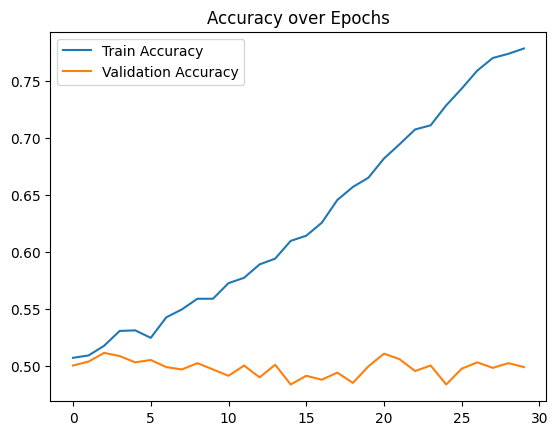

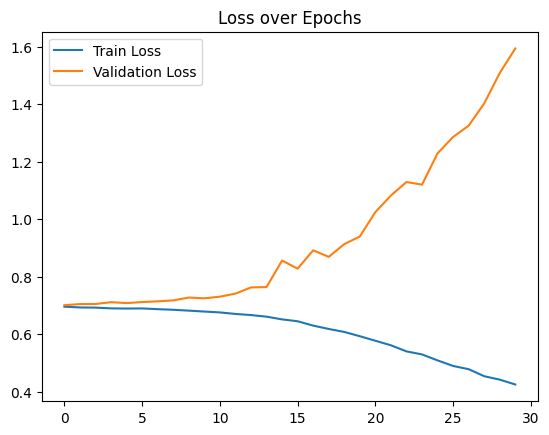

In [54]:
# 测试集评估
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 可视化训练过程
import matplotlib.pyplot as plt

# 准确率曲线
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# 损失曲线
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [55]:
from collections import Counter

print(f"Label distribution: {Counter(y_train)}")


Label distribution: Counter({0: 2941, 1: 2835})


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 展平数据，适配随机森林
X_train_flat = X_train_pca.reshape(X_train_pca.shape[0], -1)
X_test_flat = X_test_pca.reshape(X_test_pca.shape[0], -1)

# 训练随机森林
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_flat, y_train)

# 预测并评估
y_pred = clf.predict(X_test_flat)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.48753462603878117
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       748
           1       0.47      0.45      0.46       696

    accuracy                           0.49      1444
   macro avg       0.49      0.49      0.49      1444
weighted avg       0.49      0.49      0.49      1444



In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 假设 X_train, X_test, y_train, y_test 已经定义并准备好了
# 构建LSTM模型
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))  # 添加Dropout层
model.add(LSTM(units=50))
model.add(Dropout(0.3))  # 添加Dropout层
model.add(Dense(1, activation='sigmoid'))  # 二分类问题

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 早停法
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 训练模型
model.fit(X_train, y_train_encoded, epochs=35, batch_size=32, validation_data=(X_test, y_test_encoded))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 打印当前处理的时间
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Current processing time: {current_time}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5256 - loss: 0.6999 - val_accuracy: 0.5291 - val_loss: 0.6897
Epoch 2/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5515 - loss: 0.6840 - val_accuracy: 0.5222 - val_loss: 0.6917
Epoch 3/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5788 - loss: 0.6745 - val_accuracy: 0.5069 - val_loss: 0.7028
Epoch 4/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5931 - loss: 0.6651 - val_accuracy: 0.5277 - val_loss: 0.7068
Epoch 5/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6208 - loss: 0.6501 - val_accuracy: 0.5208 - val_loss: 0.7131
Epoch 6/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6371 - loss: 0.6363 - val_accuracy: 0.5298 - val_loss: 0.7073
Epoch 7/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6551 - loss: 0.6148 - val_accuracy: 0.5028 - val_loss: 0.7199
Epoch 8/35
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6639 - loss: 0.6098 - val_accuracy: 

In [9]:
# 预测测试集
predictions = model.predict(X_test)

# 将概率转换为类别
predicted_classes = (predictions > 0.5).astype("int32")

# 打印预测结果
print(predicted_classes)

# 打印当前处理的时间
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Current processing time: {current_time}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Current processing time: 2024-11-21 21:08:10


In [10]:
# 计算精确度、召回率和F1分数
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test_encoded, predicted_classes)
recall = recall_score(y_test_encoded, predicted_classes)
f1 = f1_score(y_test_encoded, predicted_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 计算混淆矩阵
cm = confusion_matrix(y_test_encoded, predicted_classes)
print("Confusion Matrix:")
print(cm)

# 打印当前处理的时间
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Current processing time: {current_time}")

Precision: 0.5042016806722689
Recall: 0.5172413793103449
F1 Score: 0.5106382978723404
Confusion Matrix:
[[394 354]
 [336 360]]
Current processing time: 2024-11-21 21:08:10
